Mean Square Error: 0
Mean Square Error: 0


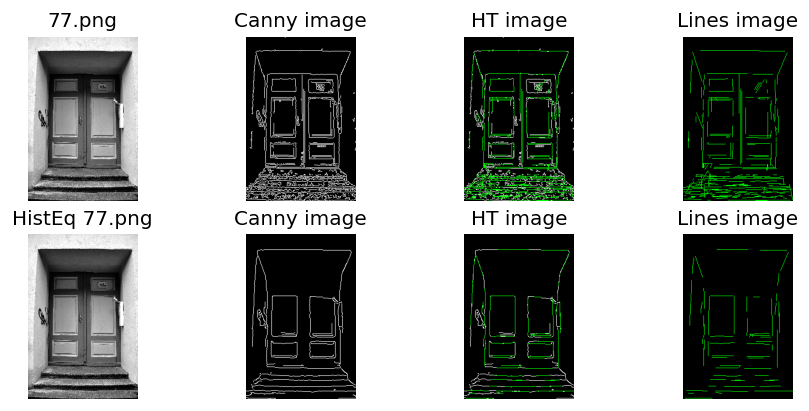

Mean Square Error: 0
Mean Square Error: 0


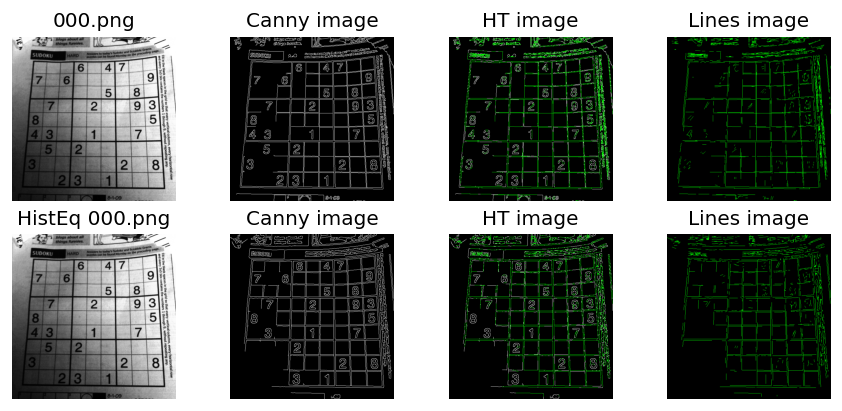

Mean Square Error: 0
Mean Square Error: 0


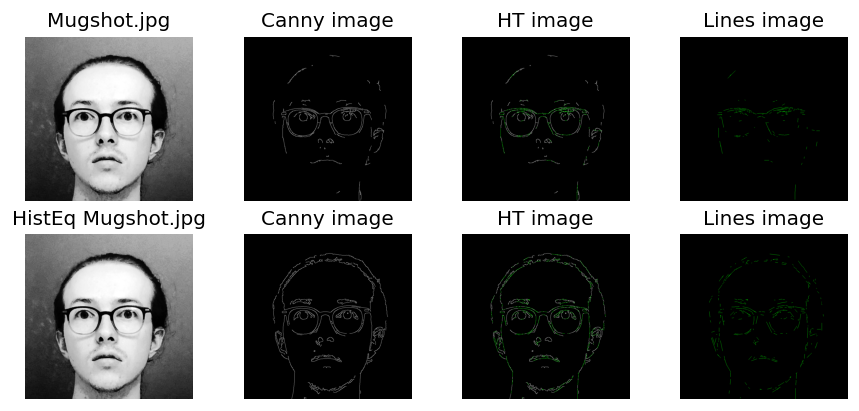

Mean Square Error: 0
Mean Square Error: 0


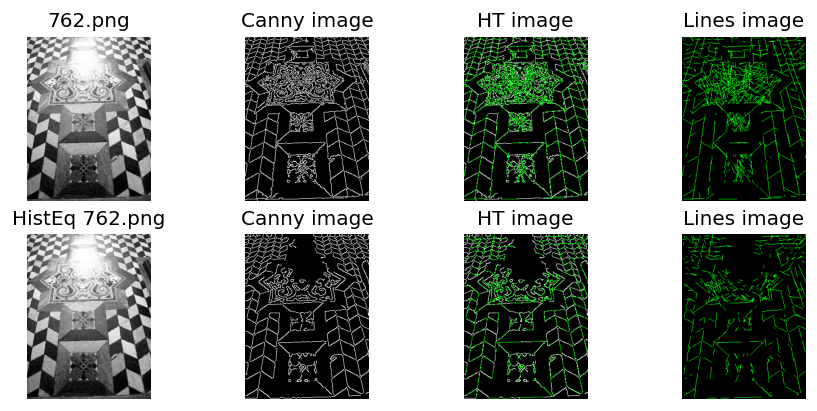

Mean Square Error: 0
Mean Square Error: 0


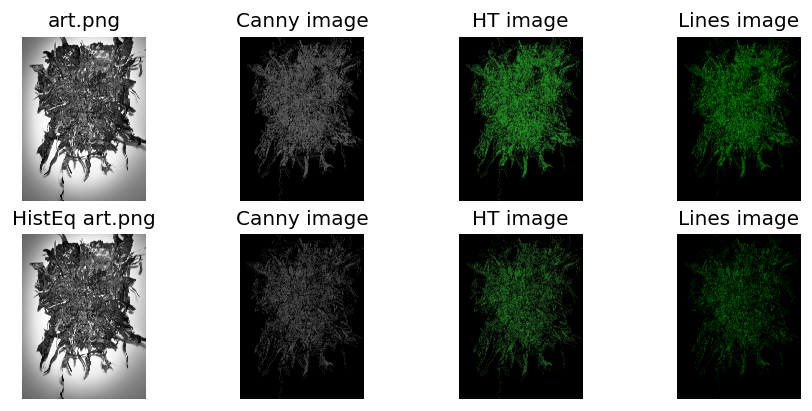

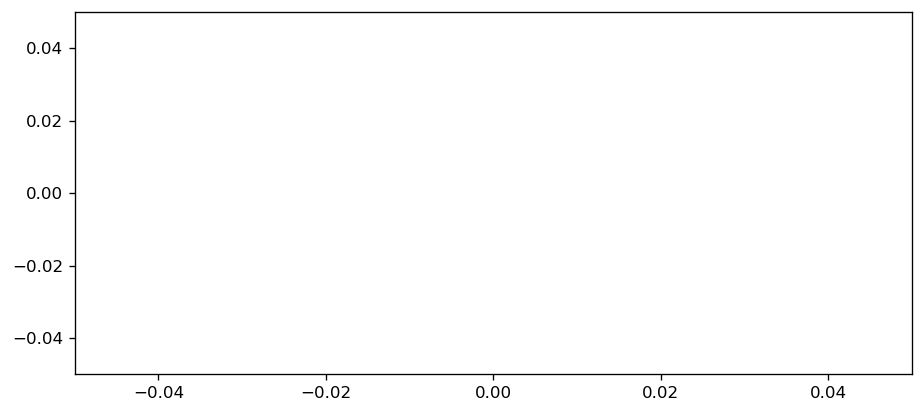

0

In [24]:
import os
import sys
import math
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

images_dir = "./images/tests/"

def msqErr(edges,lines):
    
    return 0

def insSort(arr,img,err,file):
    if arr is not None:
        for i in range(1,len(arr)):
            key = arr[i][1]
            j = i-1
            while j >=0 and key < arr[j][1] :
                    arr[j+1] = arr[j]
                    j -= 1
            arr[j+1] = (img,err,file)
    else:
        arr = [(img,err,file)]
    return arr

def sort(array):
    return
                      
def performers(arrOne,arrTwo):
    rankedTop = [(0,0,0,0)]
    rankedMid = [(0,0,0,0)]
    rankedPoor = [(0,0,0,0)]
    rankedTop.pop(0)
    rankedMid.pop(0)
    rankedPoor.pop(0)
    for i in range(1,len(arrOne)):
        filename = arrOne[i][2]
        rating = arrOne[i][1]
        for j in range(1,len(arrTwo)):
            if arrOne[i][2] == arrTwo[j][2]:
                rank = i-j
                if rank == 0:
                    arrOne[i][3] = i
                    arrOne[i][4] = rank
                    rankedMid.append(arrOne[i])
                if rank < 0:
                    arrOne[i][3] = i
                    arrOne[i][4] = rank
                    rankedTop.append(arrOne[i])
                if rank < 0:
                    arrOne[i][3] = i
                    arrOne[i][4] = rank
                    rankedPoor.append(arrOne[i])
    #Sort top
    for i in range(0, len(rankedTop)):
        for j in range(0, len(rankedTop)-i-1):
            if (rankedTop[j][3] > rankedtop[j + 1][3]):
                temp = rankedTop[j]
                rankedTop[j]= rankedTop[j + 1]
                rankedTop[j + 1]= temp
    #Sort mid
    for i in range(0, len(rankedMid)):
        for j in range(0, len(rankedMid)-i-1):
            if (rankedMid[j][4] > rankedMid[j + 1][4]):
                temp = rankedMid[j]
                rankedMid[j]= rankedMid[j + 1]
                rankedMid[j + 1]= temp
    #Sort poor
    for i in range(0, len(rankedPoor)):
        for j in range(0, len(rankedPoor)-i-1):
            if (rankedPoor[j][3] < rankedPoor[j + 1][3]):
                temp = rankedPoor[j]
                rankedPoor[j]= rankedPoor[j + 1]
                rankedPoor[j + 1]= temp

    return (rankedTop,rankedMid,rankedPoor)

def houghP(new,cdst,blank):
    lines = cv.HoughLinesP(new,1,np.pi / 180,threshold = 35,minLineLength = 3,maxLineGap=3)
    if lines is not None:
        for points in lines:
            x1, y1, x2, y2 = points[0]
            cv.line(blank, (x1, y1), (x2, y2), (0, 255, 0), 1)
            cv.line(cdst, (x1, y1), (x2, y2), (0, 255, 0), 1)
    
    return new,cdst,blank

def preprocessed(image):#(original):
    kernel = np.ones((5,5),np.uint8)
    edge_image = image
    edge_image = cv.equalizeHist(image,edge_image)
    edge_image = cv.GaussianBlur(edge_image, (5,5), 1)
    edge_image = cv.dilate(edge_image,cv.getStructuringElement(cv.MORPH_RECT, (2,2)),iterations=1)
    edge_image = cv.erode(edge_image,cv.getStructuringElement(cv.MORPH_RECT, (2,2)),iterations=1)
    edge_image = cv.GaussianBlur(edge_image, (3,3), 1)
    edge_image = cv.dilate(edge_image,cv.getStructuringElement(cv.MORPH_RECT, (2,2)),iterations=1)
    edge_image = cv.erode(edge_image,cv.getStructuringElement(cv.MORPH_RECT, (2,2)),iterations=1)
    edge_image = cv.Canny(edge_image, 75,175)#100, 200

    cdst = cv.cvtColor(edge_image, cv.COLOR_GRAY2BGR)
    blank = np.zeros((len(image),len(image[0])),np.uint8)
    blank = cv.cvtColor(blank, cv.COLOR_GRAY2BGR)

    return houghP(edge_image,cdst,blank)

def htrans(img):
    new = cv.Canny(img, 75, 175)
    cdst = cv.cvtColor(new, cv.COLOR_GRAY2RGB)
    blank = np.zeros((len(img),len(img[0])),np.uint8)
    blank = cv.cvtColor(blank, cv.COLOR_GRAY2RGB)

    return houghP(new, cdst , blank)

def run():
    resultArrays = None
    arrOne = None
    arrTwo = None
    for file in os.listdir(images_dir):
        path = os.path.join(images_dir, file)
        if os.path.isfile(path):
            img = cv.imread(path, cv.IMREAD_GRAYSCALE)
            if img is not None:
                res = htrans(img)
                resTwo = preprocessed(img)
                errOne = msqErr(img,res[2])
                errTwo = msqErr(img,resTwo[2])
                plt.figure(figsize=(9,4), dpi=120)
                plt.margins(0,0)
                plt.subplot(2,4,1)
                plt.imshow(img, cmap="gray")
                plt.title(file)
                plt.axis('off')
                plt.subplot(2,4,2)
                plt.imshow(res[0], cmap="gray")
                plt.axis('off')
                plt.title('Canny image')
                plt.subplot(2,4,3)
                plt.title('HT image')
                plt.imshow(res[1])
                plt.axis('off')
                plt.subplot(2,4,4)
                plt.title('Lines image')
                plt.imshow(res[2])
                plt.axis('off')
                print('Mean Square Error: ' + str(errOne))
                
                plt.subplot(2,4,5)
                plt.imshow(img, cmap="gray")
                plt.axis('off')
                plt.title('HistEq ' + file)
                plt.subplot(2,4,6)
                plt.imshow(resTwo[0], cmap="gray")
                plt.axis('off')
                plt.title('Canny image')
                plt.subplot(2,4,7)
                plt.title('HT image')
                plt.imshow(resTwo[1])
                plt.axis('off')
                plt.subplot(2,4,8)
                plt.title('Lines image')
                plt.imshow(resTwo[2])
                plt.axis('off')
                print('Mean Square Error: ' + str(errTwo))
                plt.show()
                arrOne = insSort(arrOne,img,errOne,file)
                arrTwo = insSort(arrTwo,img,errTwo,file)
    
    resultArrays = performers(arrOne,arrTwo)
    
    index = 0
    plt.figure(figsize=(9,4), dpi=120)
    plt.margins(0,0)
    for i in range(1,len(resultArrays)):
        for j in range(1,len(resultArrays[i])):
            index += 1
            plt.subplot(6,5,index)
            plt.imshow(resultArrays[i][0], cmap="gray")
            plt.axis('off')
            plt.title(file)
            result[i][j]
    
    plt.show()
    return 0

run()